### 영문 문서 제목 키워드 분석

1. 데이터 준비

In [1]:
#pip install nltk
#pip install xlrd #엑셀 파일 컨트롤 용 설치

import nltk # nltk.download() 를 하기위해, import 함

nltk.download()

In [2]:
import pandas as pd
import glob
import re

from functools import reduce
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud

##### 파일 병합

In [3]:
#병합할 엑셀 파일 이름 10개를 리스트에 저장
all_files = glob.glob('C:/DataMining/textData/myCabinetExcelData*.xls')
all_files

['C:/DataMining/textData\\myCabinetExcelData (1).xls',
 'C:/DataMining/textData\\myCabinetExcelData (2).xls',
 'C:/DataMining/textData\\myCabinetExcelData (3).xls',
 'C:/DataMining/textData\\myCabinetExcelData (4).xls',
 'C:/DataMining/textData\\myCabinetExcelData (5).xls',
 'C:/DataMining/textData\\myCabinetExcelData (6).xls',
 'C:/DataMining/textData\\myCabinetExcelData (7).xls',
 'C:/DataMining/textData\\myCabinetExcelData (8).xls',
 'C:/DataMining/textData\\myCabinetExcelData (9).xls',
 'C:/DataMining/textData\\myCabinetExcelData.xls']

In [4]:
all_files_data = [] #저장할 리스트

#파일 내용을 all_files_data에 추가하는append( ) 작업을 all_files 리스트의 원소 갯수만큼 반복
for file in all_files: 
    data_frame = pd.read_excel(file) 
    all_files_data.append(data_frame) 

all_files_data[0]

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C. C.",unknown,2015
1,NaN,2,Guest Editorial: Big Scholar Data Discovery an...,"Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.",unknown,2016
2,NaN,3,Guest Editorial: Big Data Analytics and the Web,"Sheng, M.; Vasilakos, A. V.; Yu, Q.; You, L.",unknown,2016
3,NaN,4,Parallel computing for preserving privacy usin...,"Yaji, Sharath; Neelima, B.",Inderscience,2018
4,NaN,5,NoSQL databases for big data,"Oussous, Ahmed; Benjelloun, Fatima-Zahra; Lahc...",Inderscience,2017
...,...,...,...,...,...,...
95,NaN,96,Smart city big data analytics: An advanced review,"Soomro, Kamran; Bhutta, Muhammad Nasir Mumtaz;...",John Wiley & Sons Ltd,2019
96,NaN,97,A watchdog approach - name-matching algorithm ...,"Kirubakaran, Anusuya; Aramudhan, M.",Inderscience,2018
97,NaN,98,An intelligent approach to Big Data analytics ...,"Verma, Neha; Singh, Jatinder",Emerald Group Publishing Limited,2017
98,NaN,99,How organisations leverage Big Data: a maturit...,"Comuzzi, Marco; Patel, Anit",Emerald Group Publishing Limited,2016


In [5]:
#세로축을 기준으로axis=0 병합하여 all_files_data_concat 리스트 에 저장
#gnore_index # True: 기존 index 무시
all_files_data_concat = pd.concat(all_files_data, axis = 0, ignore_index = True) 
all_files_data_concat

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C. C.",unknown,2015
1,NaN,2,Guest Editorial: Big Scholar Data Discovery an...,"Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.",unknown,2016
2,NaN,3,Guest Editorial: Big Data Analytics and the Web,"Sheng, M.; Vasilakos, A. V.; Yu, Q.; You, L.",unknown,2016
3,NaN,4,Parallel computing for preserving privacy usin...,"Yaji, Sharath; Neelima, B.",Inderscience,2018
4,NaN,5,NoSQL databases for big data,"Oussous, Ahmed; Benjelloun, Fatima-Zahra; Lahc...",Inderscience,2017
...,...,...,...,...,...,...
995,NaN,96,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C.",unknown,2017
996,NaN,97,Guest Editorial: Big Scholar Data Discovery an...,"Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.",unknown,2017
997,NaN,98,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C. C.",unknown,2016
998,NaN,99,Speed Up Big Data Analytics by Unveiling the S...,"Wang, J.; Zhang, X.; Yin, J.; Wang, R.; Wu, H....",unknown,2018


In [6]:
all_files_data_concat.to_csv('C:/DataMining/textData/riss_bigdata.csv', encoding = 'utf-8', index = False)

##### 데이터 전처리

In [7]:
#분석에 사용할 ‘제목’ 컬럼만 추출해 all_title 에 저장
all_title = all_files_data_concat['제목'] 
all_title

0      Guest Editorial: Big Media Data: Understanding...
1      Guest Editorial: Big Scholar Data Discovery an...
2        Guest Editorial: Big Data Analytics and the Web
3      Parallel computing for preserving privacy usin...
4                           NoSQL databases for big data
                             ...                        
995    Guest Editorial: Big Media Data: Understanding...
996    Guest Editorial: Big Scholar Data Discovery an...
997    Guest Editorial: Big Media Data: Understanding...
998    Speed Up Big Data Analytics by Unveiling the S...
999          Architecting Time-Critical Big-Data Systems
Name: 제목, Length: 1000, dtype: object

In [8]:
#nltk.corpus에서 제공하는 영어 불용어(사용하지 않는 단어 목록)를 불러와 저장
stopWords = set(stopwords.words("english"))

#표제어(어근단어=기본 사전형 단어) 추출 작업을 제공하는 WordNetLemmatizer 객체를 생성
lemma = WordNetLemmatizer()

In [9]:
words = [] 

for title in all_title: 
    #re : 정규 표현식 라이브러리, sub(패턴, 교체할 문자열, 문자열)
    # ex) [a-z] 는 a부터 z까지 중 하나, ^는 부정의 의미 -> 알파벳으로 시작하지 않는 단어 공백 치환
    EnWords = re.sub(r"[^a-zA-Z]+", " ", str(title))
    
    #word_tokenize 스페이스, 구두점으로 분해 및 단어 축약형 분해. ex)can’t -> ca, n’t
    #정규화, 단어 토큰화
    EnWordsToken = word_tokenize(EnWords.lower()) 
    
    #stopWordsstopWords에 속하지 않는 단어만 -> 불용어 제거
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords] 
    
    #표제어(어근 단어로 변경) 추출
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop] 
    
    words.append(EnWordsTokenStopLemma)

In [10]:
print(words)

[['guest', 'editorial', 'big', 'medium', 'data', 'understanding', 'search', 'mining', 'part'], ['guest', 'editorial', 'big', 'scholar', 'data', 'discovery', 'collaboration'], ['guest', 'editorial', 'big', 'data', 'analytics', 'web'], ['parallel', 'computing', 'preserving', 'privacy', 'using', 'k', 'anonymisation', 'algorithm', 'big', 'data'], ['nosql', 'database', 'big', 'data'], ['computation', 'migration', 'new', 'approach', 'execute', 'big', 'data', 'bioinformatics', 'workflow'], ['towards', 'real', 'time', 'big', 'data', 'analytics', 'platform', 'health', 'application'], ['new', 'approach', 'accurate', 'distributed', 'cluster', 'analysis', 'big', 'data', 'competitive', 'k', 'mean'], ['five', 'layer', 'architecture', 'big', 'data', 'processing', 'analytics'], ['towards', 'max', 'min', 'fair', 'resource', 'allocation', 'stream', 'big', 'data', 'analytics', 'shared', 'cloud'], ['large', 'scale', 'spectral', 'clustering', 'managing', 'big', 'data', 'healthcare', 'operation'], ['hierarc

In [11]:
#words는 2차원 리스트이므로 reduce() 함수를 사용하여 1차원 리스트로 변환
#lambda : 매개변수를 표현식대로 처리해서 출력
words2 = list(reduce(lambda x, y: x+y, words))

print(words2)

['guest', 'editorial', 'big', 'medium', 'data', 'understanding', 'search', 'mining', 'part', 'guest', 'editorial', 'big', 'scholar', 'data', 'discovery', 'collaboration', 'guest', 'editorial', 'big', 'data', 'analytics', 'web', 'parallel', 'computing', 'preserving', 'privacy', 'using', 'k', 'anonymisation', 'algorithm', 'big', 'data', 'nosql', 'database', 'big', 'data', 'computation', 'migration', 'new', 'approach', 'execute', 'big', 'data', 'bioinformatics', 'workflow', 'towards', 'real', 'time', 'big', 'data', 'analytics', 'platform', 'health', 'application', 'new', 'approach', 'accurate', 'distributed', 'cluster', 'analysis', 'big', 'data', 'competitive', 'k', 'mean', 'five', 'layer', 'architecture', 'big', 'data', 'processing', 'analytics', 'towards', 'max', 'min', 'fair', 'resource', 'allocation', 'stream', 'big', 'data', 'analytics', 'shared', 'cloud', 'large', 'scale', 'spectral', 'clustering', 'managing', 'big', 'data', 'healthcare', 'operation', 'hierarchical', 'distributed', 

3. 데이터 탐색 및 분석 모델 구축

In [12]:
# 리스트에 있는 단어별로 출현 횟수를 계산하여 딕셔너리 객체인 count를 생성
count = Counter(words2)
count

Counter({'guest': 12,
         'editorial': 17,
         'big': 1354,
         'medium': 11,
         'data': 1645,
         'understanding': 11,
         'search': 7,
         'mining': 40,
         'part': 1,
         'scholar': 3,
         'discovery': 13,
         'collaboration': 5,
         'analytics': 137,
         'web': 9,
         'parallel': 5,
         'computing': 25,
         'preserving': 2,
         'privacy': 17,
         'using': 57,
         'k': 7,
         'anonymisation': 1,
         'algorithm': 17,
         'nosql': 4,
         'database': 11,
         'computation': 2,
         'migration': 4,
         'new': 38,
         'approach': 44,
         'execute': 1,
         'bioinformatics': 2,
         'workflow': 3,
         'towards': 12,
         'real': 14,
         'time': 17,
         'platform': 19,
         'health': 37,
         'application': 25,
         'accurate': 3,
         'distributed': 18,
         'cluster': 2,
         'analysis': 67,
         

In [13]:
word_count = dict()

#데이터의 개수가 많은 순으로 정렬된 배열을 리턴
#출현 횟수가 많은 상위 50개 단어 중에서 단어 길이가 1보다 큰 것만 word_count 딕셔너리에 저장 후 출력
for tag, counts in count.most_common(50):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))


data : 1645
big : 1354
analytics : 137
analysis : 67
based : 62
using : 57
system : 50
science : 50
management : 48
challenge : 47
approach : 44
mining : 40
new : 38
research : 38
health : 37
model : 37
cloud : 34
smart : 34
learning : 33
opportunity : 31
processing : 30
technology : 28
small : 27
framework : 26
information : 26
computing : 25
application : 25
driven : 24
social : 24
issue : 24
quality : 23
network : 23
deal : 23
knowledge : 22
efficient : 22
review : 22
use : 22
era : 22
healthcare : 21
storage : 21
service : 21
perspective : 21
open : 20
platform : 19
survey : 19
making : 19
process : 19
distributed : 18
large : 18
environment : 18


##### 히스토그램 그리기

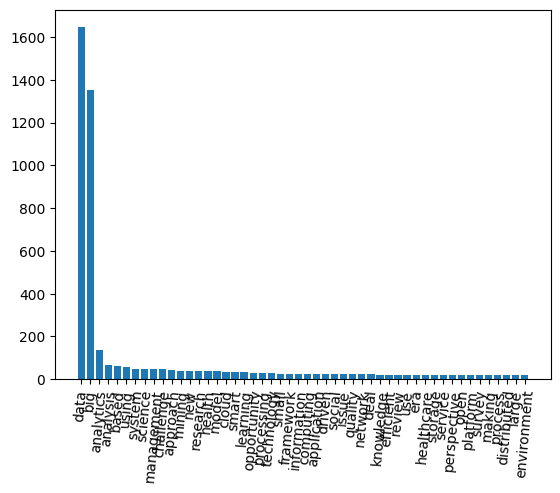

In [14]:
# get 함수 : KeKey(=단어)에 대응되는 Value(=빈도)를 리턴
# 상위 50개만 저장한 딕셔너리에서 사용할 값들을 역순으로 정렬
sorted_Keys = sorted(word_count, key = word_count.get, reverse = True)
sorted_Values = sorted(word_count.values(), reverse = True)

#일단 word_count의 개수만큼 x축을 비워놓고 그려주고 xticks 을 이용해서 x축 글자추가
plt.bar(range(len(word_count)), sorted_Values, align = 'center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = 85)

plt.show()

##### 특정 단어를 제거한뒤 히스토그램 그리기

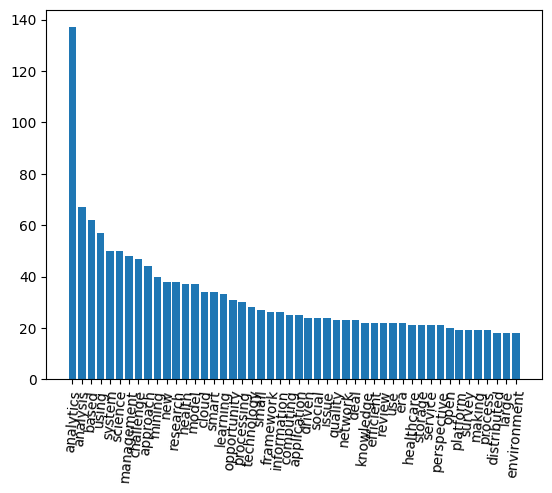

In [15]:
del word_count['big']
del word_count['data']

sorted_Keys = sorted(word_count, key = word_count.get, reverse = True)
sorted_Values = sorted(word_count.values(), reverse = True)

plt.bar(range(len(word_count)), sorted_Values, align = 'center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = 85)

plt.show()

4.결과 시각화

##### 그래프 그리기

In [16]:
all_files_data_concat['doc_count'] = 0 

#인덱스로 할지 여부. False이면 기존 인덱스가 유지
#doc_count를 세는 이유: 컬럼 표시 편의를 위함임. 예를들어'출판사' 로바꾸어도 동일 결과

#doc_count 컬럼을 추가한 뒤 '출판일’컬럼을 기준 으로 그룹을 만들고 그룹별 데이터 개수를 저장
summary_year = all_files_data_concat.groupby('출판일', as_index = False)['doc_count'].count() 
summary_year

,출판일,doc_count
0,1994,1
1,1995,1
2,1996,1
3,1998,3
4,2002,4
5,2003,1
6,2004,3
7,2005,3
8,2007,2
9,2008,3


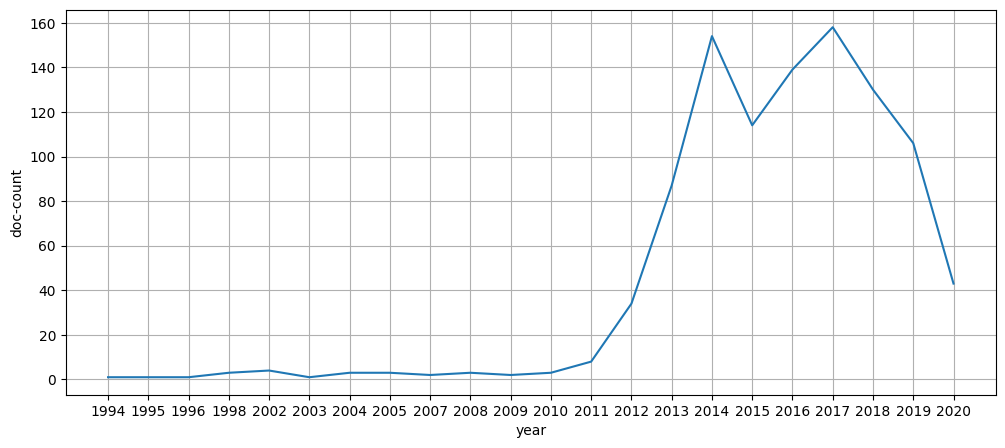

In [17]:
plt.figure(figsize = (12, 5))

plt.xlabel("year")
plt.ylabel("doc-count")

plt.grid(True)

#x축: range(), 숫자 나열 / y축 : 빈도수 크기 나열
plt.plot(range(len(summary_year)), summary_year['doc_count'])

#x축: 레이블 재설정(위치값, 표시 글자)
plt.xticks(range(len(summary_year)), [text for text in summary_year['출판일']])

plt.show()

##### 워드클라우드 그리기

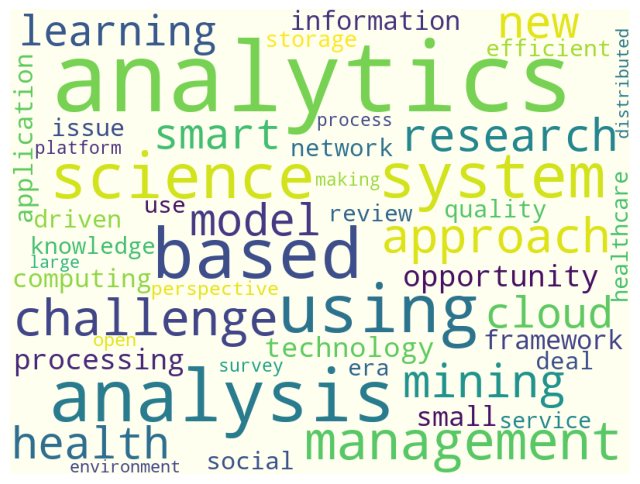

In [18]:
stopwords = set(STOPWORDS)

#불용어 처리: 전처리 했으므로 생략가능
wc = WordCloud(background_color = 'ivory', stopwords = stopwords, width = 800, height = 600)

#빈도수를 통하여 이미지를 생성해주는 함수,파라미터로 단어:빈도수 형태 dict형 입력
cloud = wc.generate_from_frequencies(word_count)

plt.figure(figsize = (8,8))

plt.imshow(cloud)
plt.axis('off')

plt.show()

In [19]:
cloud.to_file("C:/DataMining/textData/riss_bigdata_wordCloud.jpg")